<a href="https://colab.research.google.com/github/sbj6364/piano-sequencer/blob/main/04_chroma_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4번 : chroma gram 확인

앞선 문제를 통해 살펴본 피아노 음원에 대한 linear spectrogram으로부터, 음이 증가함에 따라 가장 아래에 나타난 가로 선이 점차 위로 증가함을 확인할 수 있었습니다. 악기 음원에 대해, 가장 낮은 주파수 성분을 f0 라 하며, 이 f0가 음원에 따라 증가하고 있기 때문입니다.

하지만 우리가 일반적으로 인지하는 도, 레, 미 를 Hz 단위의 frequency 축에서 확인하니 그 차이를 한눈에 알아보기 어려웠습니다. Music Information Retrieval에서는 한 옥타브를 12개의 반음으로 분할하여 ({C, C♯, D, D♯, E , F, F♯, G, G♯, A, A♯, B}) 이해하도록 돕는 chroma feature를 정의하여 사용합니다.

Piano 딕셔너리에 포함된 모든 음원(do~si)에 대해 chroma-stft  feature를 추출하고 이를 하나의 이미지에 저장하는 코드를 작성하세요.



#### 베이스라인
~~~python
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np 

def ChromaSpectrogram(wav):
		chroma = '''code here'''
		chroma = np.abs(chroma)
		return chroma

plt.figure(figsize=(16,9))
for index, item in enumerate(piano.keys()):
    '''
		code here
		'''

plt.tight_layout()
plt.savefig('Chroma.png')
~~~


In [41]:
import IPython.display as ipd
ipd.Audio('re.mp3')

In [ ]:
import librosa
do, sr_do = librosa.load('do.mp3', sr=None)
re, sr_re = librosa.load('re.mp3', sr=None)
mi, sr_mi = librosa.load('mi.mp3', sr=None)
fa, sr_fa = librosa.load('fa.mp3', sr=None)
sol, sr_sol = librosa.load('sol.mp3', sr=None)
ra, sr_ra = librosa.load('ra.mp3', sr=None)
si, sr_si = librosa.load('si.mp3', sr=None)

In [33]:
# 방법 1
piano = {'do':do, 're':re, 'mi':mi, 'fa':fa, 'sol':sol, 'ra':ra, 'si':si}
piano.values()

dict_values([array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -1.5258789e-05, -3.0517578e-05, -3.0517578e-05], dtype=float32), array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.6293945e-05,
       7.6293945e-05, 6.1035156e-05], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        0.0000000e+00, -1.5258789e-05,  0.0000000e+00], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -3.0517578e-05, -4.5776367e-05, -3.0517578e-05], dtype=float32), array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       1.5258789e-05, 1.5258789e-05], dtype=float32), array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       1.5258789e-05, 1.5258789e-05], dtype=float32), array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0517578e-05,
       3.0517578e-05, 1.5258789e-05], dtype=float32)])

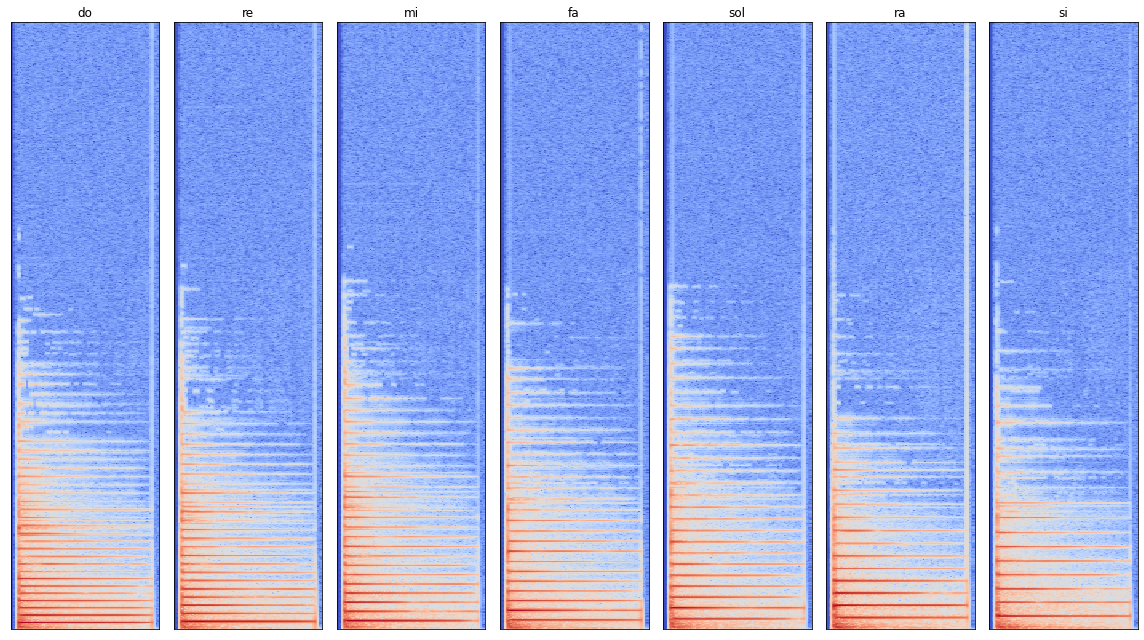

In [39]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np 

def LinearSpectrogram(wav):
		stft = librosa.stft(wav)
		stft = np.abs(stft)
		return stft

plt.figure(figsize=(16,9))
for index, item in enumerate(piano.keys()):
    wave = piano[item]
    # print(wave)
    stft = LinearSpectrogram(wave)
    plt.subplot(1,7,index+1)
    librosa.display.specshow(np.log(stft+1e-5))
    plt.title(item)

plt.tight_layout()
plt.savefig('LinearSpec.png')

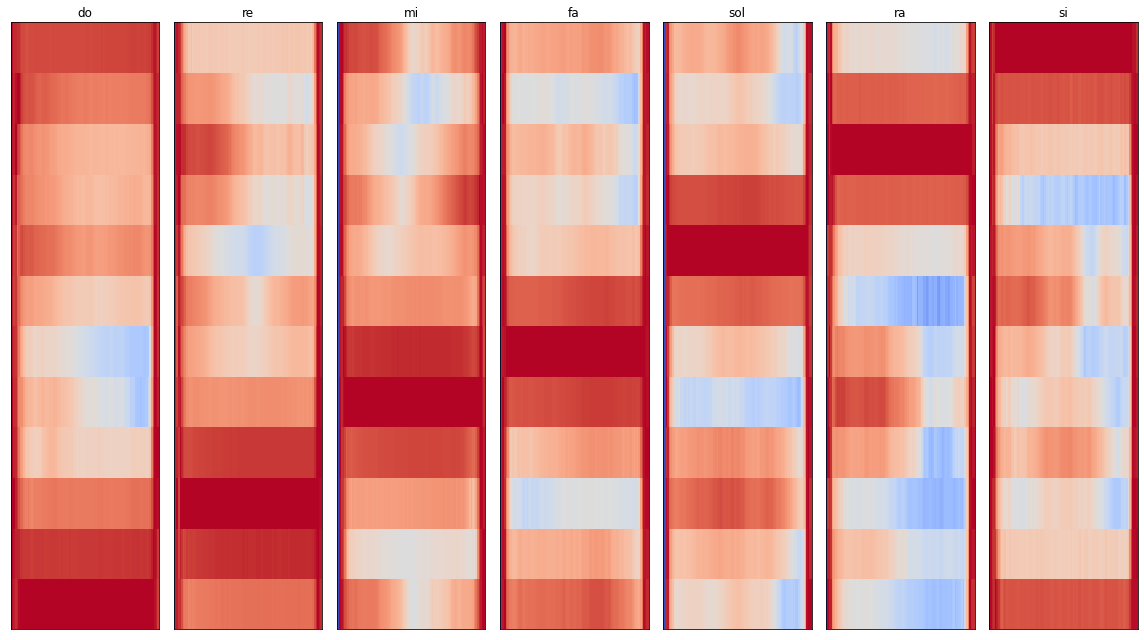

In [46]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np 

def ChromaSpectrogram(wav):
		chroma = librosa.feature.chroma_stft(wav)
		chroma = np.abs(chroma)
		return chroma

plt.figure(figsize=(16,9))
for index, item in enumerate(piano.keys()):
    wave = piano[item]
    c_stft = ChromaSpectrogram(wave)
    plt.subplot(1,7,index+1)
    librosa.display.specshow(np.log(c_stft+1e-5))
    plt.title(item)

plt.tight_layout()
plt.savefig('Chroma.png')